# 서울시 범죄 현황 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
crime_raw_data = pd.read_csv("../data/crime_2018.csv", encoding="euc-kr")
crime_raw_data.tail()

,구분,죄종,발생검거,건수
305,수서,강간,검거,171
306,수서,절도,발생,984
307,수서,절도,검거,481
308,수서,폭력,발생,1697
309,수서,폭력,검거,1443


In [3]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [4]:
crime_raw_data["죄종"].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [5]:
crime_raw_data = crime_raw_data[crime_raw_data["죄종"].notnull()]

In [6]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


---

## pivot_table

In [7]:
df = pd.read_excel("../data/sales-funnel.xlsx")

In [8]:
df.tail()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
12,239344,Stokes LLC,Cedric Moss,Fred Anderson,Software,1,10000,presented
13,307599,"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,Maintenance,3,7000,won
14,688981,Keeling LLC,Wendy Yule,Fred Anderson,CPU,5,100000,won
15,729833,Koepp Ltd,Wendy Yule,Fred Anderson,CPU,2,65000,declined
16,729833,Koepp Ltd,Wendy Yule,Fred Anderson,Monitor,2,5000,presented


In [9]:
pd.pivot_table(
    data=df,
    index =["Rep", "Manager"],
    values ="Price",
    columns="Product",
    aggfunc=[np.mean],
    fill_value=0,
    margins=True
)

mean                               \
Product                               CPU Maintenance Monitor Software   
Rep           Manager                                                    
Cedric Moss   Fred Anderson  47500.000000        5000       0    10000   
Craig Booker  Debra Henley   32500.000000        5000       0    10000   
Daniel Hilton Debra Henley   52500.000000           0       0    10000   
John Smith    Debra Henley   35000.000000        5000       0        0   
Wendy Yule    Fred Anderson  82500.000000        7000    5000        0   
All                          51666.666667        5500    5000    10000   

                                           
Product                               All  
Rep           Manager                      
Cedric Moss   Fred Anderson  27500.000000  
Craig Booker  Debra Henley   20000.000000  
Daniel Hilton Debra Henley   38333.333333  
John Smith    Debra Henley   20000.000000  
Wendy Yule    Fred Anderson  44250.000000  
All                          30705.882353

In [10]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


In [11]:
crime_station = crime_raw_data.pivot_table(
    index="구분",
    columns=["죄종","발생검거"],
    aggfunc=np.sum
)

In [12]:
crime_station.head(3)

건수                                        
죄종     강간      강도    살인      절도          폭력      
발생검거   검거   발생 검거 발생 검거 발생   검거    발생    검거    발생
구분                                               
강남    352  406  8  9  8  5  836  2020  1890  2188
강동    143  170  7  7  3  3  765  1515  1871  2224
강북    135  188  7  7  6  8  603  1112  1992  2122

In [13]:
crime_station.columns = crime_station.columns.droplevel([0])

In [14]:
crime_station["폭력", "검거"][:2]

구분
강남    1890
강동    1871
Name: (폭력, 검거), dtype: int64

In [15]:
crime_station.head(1)

죄종     강간      강도    살인      절도          폭력      
발생검거   검거   발생 검거 발생 검거 발생   검거    발생    검거    발생
구분                                               
강남    352  406  8  9  8  5  836  2020  1890  2188

In [16]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생'], dtype='object', name='발생검거')

In [17]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)

In [18]:
crime_station.columns = tmp

In [19]:
crime_station.columns

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [20]:
crime_station.head(2)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188
강동,143,170,7,7,3,3,765,1515,1871,2224


In [21]:
dict_sample = {
    "Name" : "Zara",
    "Age" : 7,
    "Class" : "First"
}

In [22]:
dict_sample

{'Name': 'Zara', 'Age': 7, 'Class': 'First'}

In [23]:
dict_sample.values()

dict_values(['Zara', 7, 'First'])

In [24]:
dict_sample["Name"]

'Zara'

In [25]:
dict_sample.get("Age")

7

---

In [26]:
crime_station.head(2)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188
강동,143,170,7,7,3,3,765,1515,1871,2224


In [27]:
real_gu = {
    '종로구' : ['종로', '혜화'],
    '중구' : ['남대문', '중부'],
    '용산구' : ['용산'],
    '성동구' : ['성동'],
    '광진구' : ['광진'],
    '동대문구' : ['동대문'],
    '중랑구' : ['중랑'],
    '성북구' : ['성북', '종암'],
    '강북구' : ['강북'],
    '도봉구' : ['도봉'],
    '노원구' : ['노원'],
    '은평구' : ['서부', '은평'],
    '서대문구' : ['서대문'],
    '마포구' : ['마포'],
    '양천구' : ['양천'],
    '강서구' : ['강서'],
    '구로구' : ['구로'],
    '금천구' : ['금천'],
    '영등포구' : ['영등포'],
    '동작구' : ['동작'],
    '관악구' : ['관악'],
    '서초구' : ['방배', '서초'],
    '강남구' : ['강남', '수서'],
    '송파구' : ['송파'],
    '강동구' : ['강동']
}

In [28]:
crime_station.head(1)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188


In [29]:
tmp_gu = []
for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name :
            tmp_gu.append(gu_name)

In [30]:
crime_station["구"] = tmp_gu

In [31]:
crime_station.to_csv("../data/crime_station.csv", sep=",", encoding="utf-8")

In [32]:
crime_gu = pd.pivot_table(data=crime_station, index="구", aggfunc=np.sum)

In [33]:
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
강서구,246,269,3,6,9,11,982,1724,2229,2619
관악구,305,352,12,10,9,9,1025,2012,2302,2643


### 살인이 많이 일어난 구는?

In [34]:
crime_gu.sort_values(["살인발생"], ascending=False).head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
영등포구,267,391,6,8,15,17,1064,2292,2570,3132
강서구,246,269,3,6,9,11,982,1724,2229,2619
강남구,523,600,10,14,13,10,1317,3004,3333,3885
관악구,305,352,12,10,9,9,1025,2012,2302,2643
강북구,135,188,7,7,6,8,603,1112,1992,2122


### 폭력이 많이 일어난 구는?

In [35]:
crime_gu["폭력발생"].sort_values(ascending=False).head()

구
강남구     3885
송파구     3135
영등포구    3132
구로구     2826
마포구     2676
Name: 폭력발생, dtype: int64

### 강도가 많이 일어난 구는?

In [36]:
crime_gu["강도발생"].sort_values(ascending=False).head()

구
강남구     14
중구      11
관악구     10
구로구      9
영등포구     8
Name: 강도발생, dtype: int64

In [37]:
(crime_gu["강도검거"] / crime_gu["강도발생"]) * 100

구
강남구      71.428571
강동구     100.000000
강북구     100.000000
강서구      50.000000
관악구     120.000000
광진구      50.000000
구로구     100.000000
금천구      85.714286
노원구     100.000000
도봉구      60.000000
동대문구     80.000000
동작구     100.000000
마포구     116.666667
서대문구    100.000000
서초구     100.000000
성동구     160.000000
성북구     200.000000
송파구     133.333333
양천구     350.000000
영등포구     75.000000
용산구      66.666667
은평구     100.000000
종로구      66.666667
중구      100.000000
중랑구     100.000000
dtype: float64

In [38]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
num = ['강간검거' , '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생' , '강도발생', '살인발생', '절도발생', '폭력발생']

In [39]:
crime_gu[target] = crime_gu[num].div(crime_gu[den].values) * 100
crime_gu.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885,87.166667,71.428571,130.0,43.841545,85.791506
강동구,143,170,7,7,3,3,765,1515,1871,2224,84.117647,100.000000,100.0,50.495050,84.127698
강북구,135,188,7,7,6,8,603,1112,1992,2122,71.808511,100.000000,75.0,54.226619,93.873704


In [40]:
import seaborn as sns

df = sns.load_dataset("titanic")
df = df[["survived", "pclass"]]

In [41]:
df*10

,survived,pclass
0,0,30
1,10,10
2,10,30
3,10,10
4,0,30
...,...,...
886,0,20
887,10,10
888,0,30
889,10,10


In [42]:
num

['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']

In [43]:
crime_gu = crime_gu.drop(columns=num)

In [44]:
crime_gu.head(5)

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [45]:
crime_gu[crime_gu[target] > 100 ] = 100

In [46]:
crime_gu.rename(columns={
    '강간발생' : '강간', 
    '강도발생' : '강도',
    '살인발생' : '살인',
    '절도발생' : '절도',
    '폭력발생' : '폭력'
}, inplace=True)

In [47]:
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [48]:
col = ['살인', '강도', '강간', '절도', '폭력']
crime_gu_norm =crime_gu[col] / crime_gu[col].max()

In [49]:
crime_gu_norm.head(2)

,살인,강도,강간,절도,폭력
구,,,,,
강남구,0.588235,1.0,1.000000,1.000000,1.000000
강동구,0.176471,0.5,0.283333,0.504328,0.572458


In [50]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]

In [51]:
crime_gu_norm.head(1)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,0.588235,1.0,1.0,1.0,1.0,87.166667,71.428571,100.0,43.841545,85.791506


In [52]:
col

['살인', '강도', '강간', '절도', '폭력']

In [53]:
crime_gu_norm["범죄"] = np.mean(crime_gu_norm[col], axis=1)

In [54]:
crime_gu_norm.head(1)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,0.588235,1.0,1.0,1.0,1.0,87.166667,71.428571,100.0,43.841545,85.791506,0.917647


In [55]:
crime_gu_norm["검거"] = np.mean(crime_gu_norm[["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]], axis=1)

In [56]:
crime_gu_norm.head(1)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,0.588235,1.0,1.0,1.0,1.0,87.166667,71.428571,100.0,43.841545,85.791506,0.917647,77.645658


### 범죄 평균치로 정렬했을 때 서울시에서 범죄가 많이 일어나는 구는?

In [57]:
crime_gu_norm["범죄"].sort_values(ascending = False).head()

구
강남구     0.917647
영등포구    0.758451
관악구     0.636089
마포구     0.585618
구로구     0.565819
Name: 범죄, dtype: float64

In [58]:
crime_gu_norm["검거"].sort_values(ascending = False).head()

구
은평구    88.422435
중랑구    85.141076
관악구    84.938011
금천구    84.731311
양천구    84.643240
Name: 검거, dtype: float64

In [59]:
import seaborn as sns

target_col = col2 + ["검거"]
target_col2 = col + ["범죄"]

In [60]:
target_col

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [62]:
crime_gu_norm_sort = crime_gu_norm.sort_values(by="검거", ascending=False)

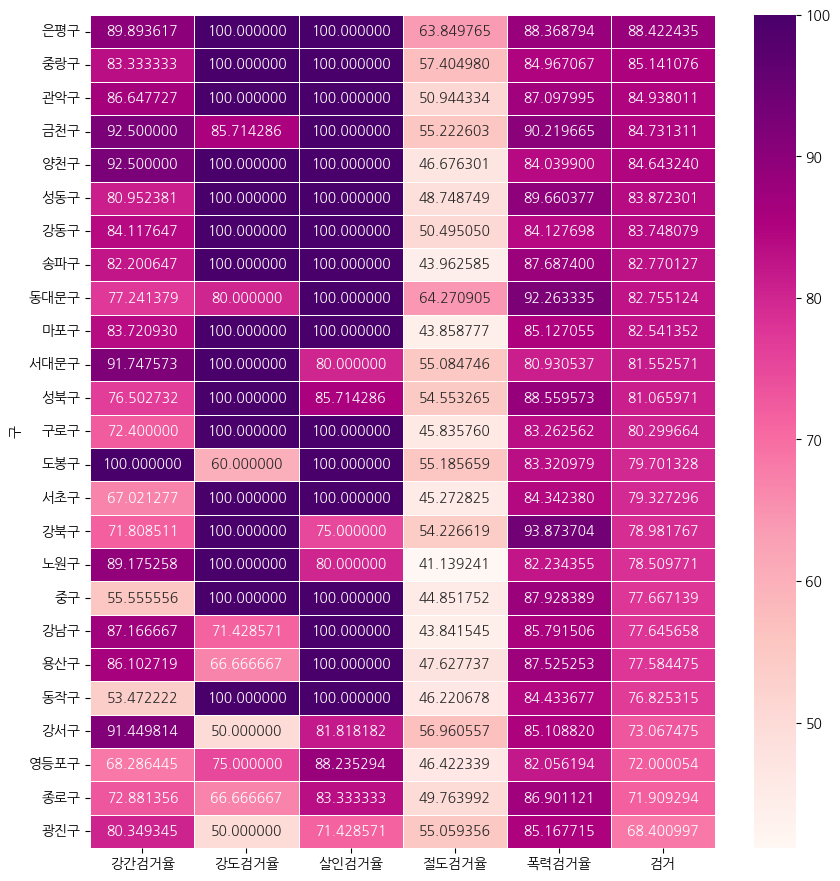

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col], annot=True, fmt="f", linewidths=.5, cmap="RdPu")

plt.autoscale()
plt.tight_layout(pad=5)

plt.show();

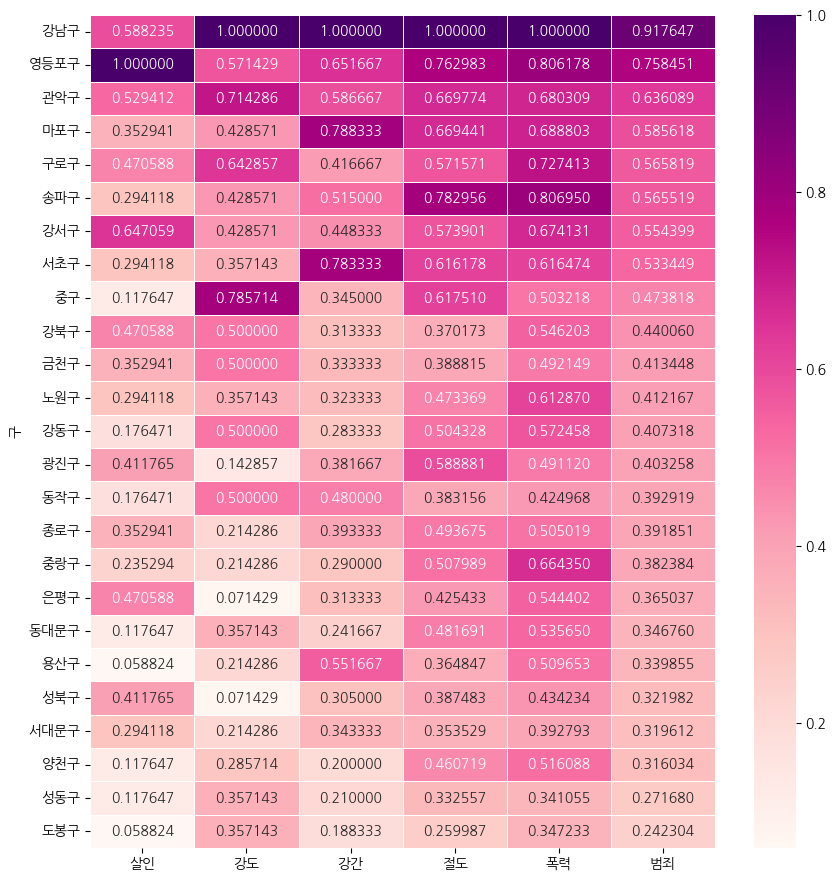

In [64]:
crime_gu_norm_sort = crime_gu_norm.sort_values(by="범죄", ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col2], annot=True, fmt="f", linewidths=.5, cmap="RdPu")

plt.autoscale()
plt.tight_layout(pad=5)

plt.show();

In [65]:
crime_gu.to_csv("../data/seoul_crime_result.csv", sep=",", encoding="utf-8")

In [66]:
# !pip install folium

## 지도 시각화 folium

In [67]:
import folium

In [68]:
m = folium.Map(location=[45.5236, -122.6750], tiles="Stamen Toner" ,zoom_start=13)
m

In [69]:
m = folium.Map(localation=[45.372, -121.6972], zoom_start=30, tiles="Stamen Terrain")

In [70]:
folium.Marker(location=[45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", icon=folium.Icon(icon="cloud")).add_to(m)
folium.Marker(location=[45.3311, -121.7113], popup="<b>Timberline Lodge</b>").add_to(m)

In [71]:
m

In [72]:
folium.Marker(location=[45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", icon=folium.Icon(icon="cloud")).add_to(m)
folium.Marker(location=[45.3311, -121.7113], popup="<b>Timberline Lodge</b>", icon=folium.Icon(color="green")).add_to(m)

folium.Marker(location=[45.3300, -121.6823], popup="한글테스트", icon=folium.Icon(color="red", icon="info-sign")).add_to(m)

In [73]:
m

In [74]:
m = folium.Map([45.5236, -122.6750], tiles="Stamen Toner", zoom_start=13)

folium.Circle(radius=100, location=[45.5244, -122.6699], popup="The Waterfront")

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup="The Waterfront",
    color="crimson",
    fill=True
).add_to(m)

folium.CircleMarker(
    radius=50,
    location=[45.5215, -122.6261],
    popup="Circle Marker",
    color="#3186cc",
    fill=True,
    fill_color="crimson"
).add_to(m)

In [75]:
m

In [76]:
m = folium.Map([46.1991, -122.1889], tiles="Stamen Terrain", zoom_start=13)
m.add_child(folium.LatLngPopup())
m 

In [77]:
import json
import pandas as pd
state_data = pd.read_csv("../data/02/02. US_Unemployment_Oct2012.csv")
state_data.tail(1)

,State,Unemployment
49,WY,5.1


In [78]:
dict_json = {'key' : 'value', '지역': 'Lat,Lng'}
dict_json

{'key': 'value', '지역': 'Lat,Lng'}

In [79]:
m = folium.Map(location=[48, -102], zoom_start=3)

m.choropleth(
    geo_data="../data/02/02. us-states.json",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
            
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)"
)

m

/home/thro/venv/data_venv/lib/python3.8/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## 범죄현황 지도 시각화하기

In [80]:
import json

crime_anal_norm = pd.read_csv("../data/seoul_crime_result.csv", index_col=0, encoding="utf-8")
crime_anal_norm.head(1)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.0,43.841545,85.791506


In [81]:
geo_path = "../data/02/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [82]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="Stamen Toner")

my_map

In [83]:
my_map.choropleth(
    geo_data=geo_str, 
    data=crime_anal_norm["살인"],
    columns=[crime_anal_norm.index, crime_anal_norm["살인"]],
    key_on="feature.id",
    
    fill_color ="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="정규화된 살인 발생 건수"
)

my_map

/home/thro/venv/data_venv/lib/python3.8/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [84]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = "Stamen Toner")

my_map.choropleth(
    geo_data=geo_str,
    data=crime_anal_norm["강간"],
    columns=[crime_anal_norm.index, crime_anal_norm["강간"]],
    key_on="feature.id",
    
    fill_color="PuRd",
    fill_opacity=1,
    line_opacity=1,
    legend_name="정규화된 강간 발생 건수"
)

my_map

# 5대 범죄 발생 건수 지도 시각화

In [88]:
my_crime_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = "Stamen Toner")

my_crime_map.choropleth(
    geo_data=geo_str,
    data=crime_gu_norm["범죄"],
    columns=[crime_gu_norm.index, crime_gu_norm["범죄"]],
    key_on="feature.id",

    fill_color="BuGn",
    fill_opacity=1,
    line_opacity=1,
    legend_name="서울시 5대 범죄 발생 평균 건수"
)

my_crime_map

/home/thro/venv/data_venv/lib/python3.8/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [ ]:
## 검거 평균 지도 시각화

In [95]:
my_arrest_map = folium.Map(location=[37.5502, 126.982], zoom_start = 11, tiles = "Stamen Toner")

my_arrest_map.choropleth(
    geo_data=geo_str,
    data=crime_gu_norm["검거"],
    columns=[crime_gu_norm.index, crime_gu_norm["검거"]],
    key_on="feature.id",

    fill_color="PuRd",
    fill_opacity=1,
    line_opacity=1,
    legend_name="서울시 5대 범죄 발생 검거 건수"
)

my_arrest_map